In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import TruncatedSVD

'''from sklearn import '''
import matplotlib.pyplot as plt

In [2]:
#df_courseTags = pd.read_csv('course_tags.csv',error_bad_lines=False, encoding="latin-1")

In [3]:
df_user_assessment_scores = pd.read_csv('user_assessment_scores.csv',error_bad_lines=False, encoding="latin-1")

In [4]:
#df_user_interests = pd.read_csv('user_interests.csv',error_bad_lines=False, encoding="latin-1")

In [5]:
#df_user_course_views = pd.read_csv('user_course_views.csv', error_bad_lines=False, encoding="latin-1")

In [6]:
df_user_assessment_scores.head()

,user_handle,assessment_tag,user_assessment_date,user_assessment_score
0,7487,angular-js,2017-08-11 19:03:38,134
1,7487,css,2017-08-11 20:09:56,38
2,7487,html5,2017-07-31 18:59:37,84
3,7487,java,2017-07-31 18:49:27,149
4,7487,javascript,2017-07-31 19:05:03,92


In [7]:
df_user_course_views = pd.read_csv('user_course_views.csv', error_bad_lines=False, encoding="latin-1")

In [8]:
plt.rc("font", size = 15)

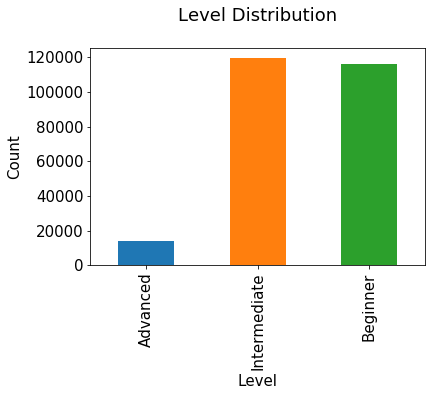

In [9]:
'''Experimenting w/df_user_course_views. Worked: level, Did not work: course_id, user_handle,author_handle '''
df_user_course_views.level.value_counts(sort=False).plot(kind='bar')
plt.title('Level Distribution\n')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

In [10]:
# Similarity #1-> Users who have same level can be categorized together

In [11]:
assessment_score = pd.DataFrame(df_user_assessment_scores.groupby('assessment_tag')['user_assessment_score'].mean())
assessment_score['assessment_count'] = pd.DataFrame(df_user_assessment_scores.groupby('assessment_tag')['user_assessment_score'].count())

In [12]:
assessment_score.sort_values('assessment_count',ascending=False).head()

,user_assessment_score,assessment_count
assessment_tag,,
c-sharp,147.857311,848
javascript,141.266927,768
java,142.045977,522
python,140.700000,450
html5,142.080460,435


In [13]:
assessment_score.sort_values('user_assessment_score',ascending=False).head()

,user_assessment_score,assessment_count
assessment_tag,,
nuke-core-skills,172.000000,1
maya-environment-modeling,162.500000,14
autocad,161.384615,13
maya-modeling,157.777778,27
azure-solutions-architect,157.666667,18


In this data set, course that received the most assessment was not highly scored at all. As a result, if we were to use similarity scores based on assessment counts, we would definitely make mistakes here. So, we need to have a better system. let us also see the distribution of scores next.

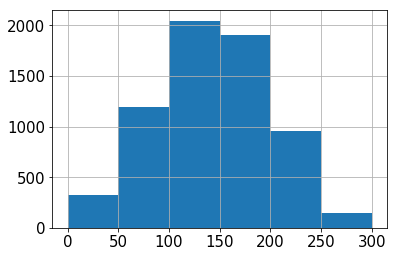

In [14]:
# distribution of user scores
df_user_assessment_scores.user_assessment_score.hist(bins=[0,50,100,150,200,250,300])
plt.show()

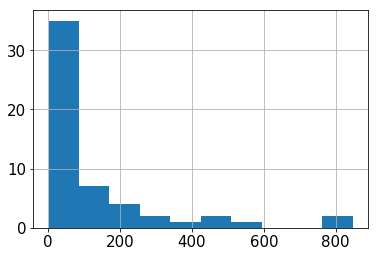

In [15]:
# distribution of course count, not by name, just a general understanding of how many are taken.
df_user_assessment_scores.assessment_tag.value_counts().hist()
plt.show()

To ensure statistical significance, and based on above two graph distributions, only popular courses will be included. 
Courses that have been assessed (not the actual score, but the number of times attempted).

# was planning to try this

counts1 = df_user_assessment_scores['user_assessment_score'].value_counts()
df_user_assessment_scores = df_user_assessment_scores[df_user_assessment_scores['user_assessment_score'].isin(counts1[counts1>=250].index)]
df_user_assessment_scores.shape

In [16]:
df_user_assessment_scores = df_user_assessment_scores.drop(['user_assessment_date'], axis =1)

In [17]:
df_user_assessment_scores.head()

,user_handle,assessment_tag,user_assessment_score
0,7487,angular-js,134
1,7487,css,38
2,7487,html5,84
3,7487,java,149
4,7487,javascript,92


lets drop off the less assessed course and get statistically signiicant data in terms of assessed_course_count

In [18]:
assessment_score.sort_values('user_assessment_score',ascending=False)

,user_assessment_score,assessment_count
assessment_tag,,
nuke-core-skills,172.000000,1
maya-environment-modeling,162.500000,14
autocad,161.384615,13
maya-modeling,157.777778,27
azure-solutions-architect,157.666667,18
maya-core-skills,153.333333,24
sharepoint,150.377778,45
docker,149.377953,127
azure-administrator,149.095238,42


In [19]:
df_user_asses = df_user_assessment_scores.copy()

In [20]:
df_user_asses.head()

,user_handle,assessment_tag,user_assessment_score
0,7487,angular-js,134
1,7487,css,38
2,7487,html5,84
3,7487,java,149
4,7487,javascript,92


In [21]:
course_assess_count = pd.DataFrame(df_user_asses.assessment_tag.value_counts().reset_index())
course_assess_count.columns = ['assessment_tag','totCount']
print(course_assess_count.head())

  assessment_tag  totCount
0        c-sharp       848
1     javascript       768
2           java       522
3         python       450
4          html5       435


Now we combine the course_tags data w/ assessment count

In [22]:
# merge 'df' & 'brands_count'
merged = pd.merge(df_user_asses, course_assess_count, on='assessment_tag')
print(merged.tail())

      user_handle                        assessment_tag  \
6566         9777             windows-server-management   
6567         7665             windows-server-management   
6568         5081                      nuke-core-skills   
6569         3180  revit-architecture-modeling-families   
6570         5219  revit-architecture-modeling-families   

      user_assessment_score  totCount  
6566                    118         3  
6567                    168         3  
6568                    172         1  
6569                    127         2  
6570                     98         2  


In [23]:
merged.head()

,user_handle,assessment_tag,user_assessment_score,totCount
0,7487,angular-js,134,283
1,1755,angular-js,23,283
2,9914,angular-js,122,283
3,4048,angular-js,108,283
4,831,angular-js,131,283


In [24]:
df_user_assessment_scores_Pivot = merged.copy()

#Implementing kNN

In [25]:
from scipy.sparse import csr_matrix
# convert user_assessment_scores to a 2D matrix
df_user_assessment_scores_Pivot = df_user_assessment_scores.pivot(index='user_handle', columns='assessment_tag').user_assessment_score.fillna(0)



In [26]:
user_handle = df_user_assessment_scores_Pivot.index
assessment_tag = df_user_assessment_scores_Pivot.columns
print(df_user_assessment_scores_Pivot.shape)
df_user_assessment_scores_Pivot.head()

(3114, 54)


assessment_tag,3ds-max-environment-modeling,active-directory-administration,after-effects-cc,android,android-associate-developer,angular,angular-js,aspnet-mvc-5,autocad,azure-administrator,...,revit-architecture-modeling-families,security-for-hackers-and-developers,sharepoint,solidworks-core-skills,the-scrum-framework,unity-game-development-core-skills,using-microsoft-office-2016,video-production,windows-server-management,zbrush-core-skills
user_handle,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
df_user_assessment_scores_matrix = csr_matrix(df_user_assessment_scores_Pivot.values)

In [28]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_user_assessment_scores_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

Folowing the process..

In [29]:
query_index = np.random.choice(df_user_assessment_scores_Pivot.shape[0])
distances, indices = model_knn.kneighbors(df_user_assessment_scores_Pivot.iloc[query_index, :].reshape(1, -1), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(df_user_assessment_scores_Pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, df_user_assessment_scores_Pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for 8654:

1: 2713, with distance of 0.0:
2: 4733, with distance of 0.0:
3: 9633, with distance of 0.0:
4: 4030, with distance of 0.0:
5: 416, with distance of 0.0:


/Users/nr/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [30]:
df_user_assessment_scores_Pivot2 = merged.pivot(index = 'user_handle', columns = 'assessment_tag', values = 'user_assessment_score').fillna(0)

In [31]:
df_user_assessment_scores_Pivot2.head()

assessment_tag,3ds-max-environment-modeling,active-directory-administration,after-effects-cc,android,android-associate-developer,angular,angular-js,aspnet-mvc-5,autocad,azure-administrator,...,revit-architecture-modeling-families,security-for-hackers-and-developers,sharepoint,solidworks-core-skills,the-scrum-framework,unity-game-development-core-skills,using-microsoft-office-2016,video-production,windows-server-management,zbrush-core-skills
user_handle,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_user_assessment_scores_Pivot2.shape

(3114, 54)

In [33]:
X = df_user_assessment_scores_Pivot2.values.T
X.shape

(54, 3114)

In [36]:
import sklearn
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12, random_state=17)
matrix = SVD.fit_transform(X)
matrix.shape

(54, 12)

In [37]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
corr = np.corrcoef(matrix)
corr.shape

(54, 54)

In [41]:
course_tags = df_user_assessment_scores_Pivot2.columns
course_tags_list = list(course_tags)
test_name = course_tags_list.index("windows-server-management")
print(test_name)

52


In [42]:
corr_test_name = corr[test_name]

In [43]:
list(course_tags[(corr_test_name<1.0) & (corr_test_name>0.9)])

[u'active-directory-administration',
 u'azure-administrator',
 u'azure-infrastructure-as-a-service',
 u'azure-solutions-architect',
 u'group-policy-administration-and-troubleshooting',
 u'powershell']